In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/AnnotedData.csv')
df

,"Gender(Male=1, Female=0)","Age(0-15=0, 16-26=1, 27-40=2, 41-55=3, 55+=4)","Mstatus(Single=0, Married=1)","MajorDiseases(None=0, Allergy=1, Asthma=2, Kidney Disease=3, High Blood Pressure=4, Heart Disease=5, 6=6)","Vaccine(Sinopharma=1, Moderna=2, Pfizer=3, AstraZeneca=4, COVISHIELD=5)",Symptoms,"Satisfied(Yes=1, No=0)","TB(Yes=1, No=0)",Sum_Symptoms,"Severity(Non-Severe=0, Mild-Severe=1, Very-severe=2)"
0,1,1,0,0,1,1+1,1,0,2,0
1,1,1,0,1,1,1+2+1+1,1,1,5,1
2,1,1,0,1,2,3,1,0,3,1
3,1,1,0,1,2,3,1,0,3,1
4,1,1,0,1,2,1+3,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...
887,0,1,0,0,1,3+1,0,0,4,1
888,0,1,0,0,1,0,0,0,0,0
889,1,1,0,0,1,3+2+3+2,0,0,10,2
890,0,1,0,2+1,1,0,0,0,0,0


In [ ]:
x=df.drop(['Gender(Male=1, Female=0)','Age(0-15=0, 16-26=1, 27-40=2, 41-55=3, 55+=4)','Mstatus(Single=0, Married=1)','MajorDiseases(None=0, Allergy=1, Asthma=2, Kidney Disease=3, High Blood Pressure=4, Heart Disease=5, 6=6)','Vaccine(Sinopharma=1, Moderna=2, Pfizer=3, AstraZeneca=4, COVISHIELD=5)','Symptoms','Satisfied(Yes=1, No=0)','TB(Yes=1, No=0)','Severity(Non-Severe=0, Mild-Severe=1, Very-severe=2)'],axis=1).values
y=df['Severity(Non-Severe=0, Mild-Severe=1, Very-severe=2)'].values

#linearity depends on sum_syntomps only 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8839609531256247

In [ ]:
ml.coef_

array([0.21342608])

In [ ]:
ml.intercept_

0.02702789282200313

In [ ]:
ml.score(x,y)

0.873982632482736

In [ ]:
from scipy import stats
corr,p= stats.pearsonr(y_test,y_pred )
print(round(corr,8))
print(round(p,8))

#If a p values of 0,
#It means the null hypothesis is rejected and your test is statistically significant

0.9408194
0.0


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Values': y_pred,'Difference':y_test-y_pred})
pred_y_df[35:70]

,Actual Value,Predicted Values,Difference
35,0,0.027028,-0.027028
36,1,0.667306,0.332694
37,2,2.588141,-0.588141
38,1,0.667306,0.332694
39,0,0.027028,-0.027028
40,1,0.880732,0.119268
41,1,0.667306,0.332694
42,2,1.521010,0.478990
43,1,1.307584,-0.307584
44,2,1.521010,0.478990


In [ ]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test,y_pred)
MSE

0.06340917397701998

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE= mean_absolute_error(y_test,y_pred)
MAE

0.18773733556322

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.2518117828399219

Text(0.5, 0, 'Predicted Severity')

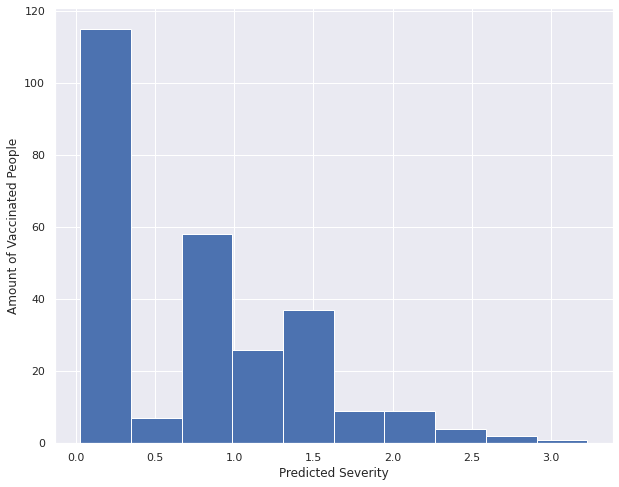

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(y_pred)
plt.ylabel('Amount of Vaccinated People')
plt.xlabel('Predicted Severity')

Text(0.5, 0, 'Actual Severity')

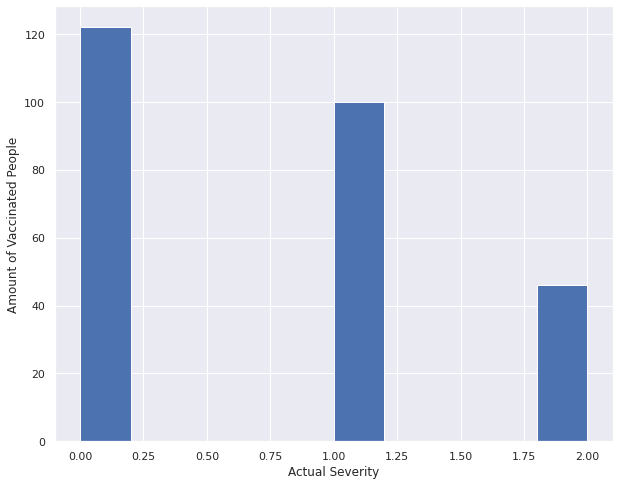

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(y_test)
plt.ylabel('Amount of Vaccinated People')
plt.xlabel('Actual Severity')

<Figure size 864x720 with 0 Axes>

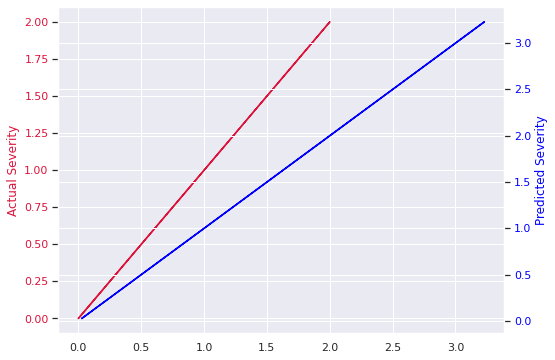

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

x=y_test
y=y_pred

fig, ax1 = plt.subplots()
ax1.plot(x,x,color='crimson')
ax1.set_ylabel('Actual Severity',color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

ax2= ax1.twinx()
ax2.plot(y,y,color='blue')
ax2.set_ylabel('Predicted Severity',color='blue')
ax2.tick_params(axis='y',labelcolor='blue')